# Regional Features

In [1]:
!pip install kmapper
!pip install pyballmapper

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import kmapper as km
import pyballmapper as pbm
import statistics
import seaborn as sb
import networkx as nx
from matplotlib.colors import ListedColormap
from matplotlib import colormaps as cm
from sklearn.preprocessing import StandardScaler

First will clean datasets for TDABM

In [3]:
regional_df = pd.read_csv('regional_features_final.csv')
regional_df.head()

,nuts318nm,nuts318cd,year,uk_employees,eu_employees,non_eu_employees,pct_uk_employees,pct_eu_employees,pct_non_eu_employees,employment_shareA,employment_shareB,employment_shareC,employment_shareD,employment_shareE,employment_shareF,employment_shareG,employment_shareH,employment_shareI,employment_shareJ,employment_shareK,employment_shareL,employment_shareM,employment_shareN,employment_shareO,employment_shareP,employment_shareQ,employment_shareR,employment_shareS,median_monthly_pay,pct_employed,pct_unemployed,pct_econ_inactive,pct_claimants,pop_density,region_area_km2,job_density,pct_single_parent,eu_leave_vote_share,pct_non_english_language,median_house_price,eu_nino_issue,noneu_nino_issue,total_nino
0,Hartlepool and Stockton-on-Tees,UKC11,2015.0,110380.0,2387.0,2583.0,0.9569,0.0207,0.0224,0.0011,0.0019,0.1127,0.0069,0.0108,0.0693,0.1473,0.0433,0.0693,0.0173,0.0217,0.0130,0.1040,0.0693,0.0433,0.0867,0.1473,0.0195,0.0152,1534.75,70.5,7.7,23.5,3.36,966.3,308.17,0.68,16.7,0.64,2.55,129218.75,377.0,421.0,798.0
1,South Teesside,UKC12,2015.0,95778.0,1936.0,2372.0,0.9570,0.0193,0.0237,0.0017,0.0100,0.0799,0.0020,0.0050,0.0449,0.1398,0.0499,0.0599,0.0175,0.0150,0.0150,0.0699,0.0599,0.0499,0.1199,0.2197,0.0250,0.0150,1471.50,65.5,10.1,27.0,4.04,919.8,308.44,0.67,15.5,0.66,4.35,125524.38,972.0,587.0,1559.0
2,Darlington,UKC13,2015.0,48947.0,1042.0,1222.0,0.9558,0.0203,0.0239,0.0029,0.0020,0.0781,0.0000,0.0044,0.0342,0.1367,0.0488,0.0683,0.0586,0.0439,0.0088,0.0878,0.0878,0.0586,0.0683,0.1757,0.0156,0.0195,1526.67,72.6,6.4,22.2,2.88,537.1,197.48,0.85,11.8,0.56,4.20,130500.00,343.0,80.0,423.0
3,Durham CC,UKC14,2015.0,164527.0,3546.0,3787.0,0.9573,0.0206,0.0220,0.0052,0.0012,0.1454,0.0007,0.0087,0.0581,0.1454,0.0407,0.0756,0.0116,0.0102,0.0145,0.0523,0.0523,0.0814,0.1163,0.1454,0.0174,0.0174,1559.92,67.4,7.7,26.9,2.21,233.4,2232.70,0.59,15.8,0.58,1.90,110000.00,608.0,505.0,1113.0
4,Northumberland,UKC21,2015.0,97576.0,2183.0,2469.0,0.9545,0.0213,0.0242,0.0195,0.0034,0.1270,0.0024,0.0122,0.0488,0.1563,0.0293,0.1074,0.0171,0.0078,0.0146,0.0586,0.0439,0.0342,0.0879,0.1758,0.0293,0.0244,1507.83,74.2,5.5,21.3,1.37,63.2,5078.18,0.63,11.0,0.54,1.10,153062.50,298.0,92.0,390.0


In [4]:
regional_df.dtypes

nuts318nm                    object
nuts318cd                    object
year                        float64
uk_employees                float64
eu_employees                float64
non_eu_employees            float64
pct_uk_employees            float64
pct_eu_employees            float64
pct_non_eu_employees        float64
employment_shareA           float64
employment_shareB           float64
employment_shareC           float64
employment_shareD           float64
employment_shareE           float64
employment_shareF           float64
employment_shareG           float64
employment_shareH           float64
employment_shareI           float64
employment_shareJ           float64
employment_shareK           float64
employment_shareL           float64
employment_shareM           float64
employment_shareN           float64
employment_shareO           float64
employment_shareP           float64
employment_shareQ           float64
employment_shareR           float64
employment_shareS           

In [5]:
# Convert all object columns to float64 except 'nuts318nm' and 'nuts318cd'
for col in regional_df.select_dtypes(include=['object']).columns:
    if col not in ['nuts318nm', 'nuts318cd']:
        regional_df[col] = pd.to_numeric(regional_df[col], errors='coerce')

# Verify the changes
regional_df.dtypes

nuts318nm                    object
nuts318cd                    object
year                        float64
uk_employees                float64
eu_employees                float64
non_eu_employees            float64
pct_uk_employees            float64
pct_eu_employees            float64
pct_non_eu_employees        float64
employment_shareA           float64
employment_shareB           float64
employment_shareC           float64
employment_shareD           float64
employment_shareE           float64
employment_shareF           float64
employment_shareG           float64
employment_shareH           float64
employment_shareI           float64
employment_shareJ           float64
employment_shareK           float64
employment_shareL           float64
employment_shareM           float64
employment_shareN           float64
employment_shareO           float64
employment_shareP           float64
employment_shareQ           float64
employment_shareR           float64
employment_shareS           

In [6]:
# Check if there are any rows with entirely null values
rows_with_all_nulls = regional_df[regional_df.isnull().all(axis=1)]
rows_with_all_nulls

,nuts318nm,nuts318cd,year,uk_employees,eu_employees,non_eu_employees,pct_uk_employees,pct_eu_employees,pct_non_eu_employees,employment_shareA,employment_shareB,employment_shareC,employment_shareD,employment_shareE,employment_shareF,employment_shareG,employment_shareH,employment_shareI,employment_shareJ,employment_shareK,employment_shareL,employment_shareM,employment_shareN,employment_shareO,employment_shareP,employment_shareQ,employment_shareR,employment_shareS,median_monthly_pay,pct_employed,pct_unemployed,pct_econ_inactive,pct_claimants,pop_density,region_area_km2,job_density,pct_single_parent,eu_leave_vote_share,pct_non_english_language,median_house_price,eu_nino_issue,noneu_nino_issue,total_nino
1790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Drop rows with entirely null values from the dataset
regional_df = regional_df.dropna(how='all')
regional_df

,nuts318nm,nuts318cd,year,uk_employees,eu_employees,non_eu_employees,pct_uk_employees,pct_eu_employees,pct_non_eu_employees,employment_shareA,employment_shareB,employment_shareC,employment_shareD,employment_shareE,employment_shareF,employment_shareG,employment_shareH,employment_shareI,employment_shareJ,employment_shareK,employment_shareL,employment_shareM,employment_shareN,employment_shareO,employment_shareP,employment_shareQ,employment_shareR,employment_shareS,median_monthly_pay,pct_employed,pct_unemployed,pct_econ_inactive,pct_claimants,pop_density,region_area_km2,job_density,pct_single_parent,eu_leave_vote_share,pct_non_english_language,median_house_price,eu_nino_issue,noneu_nino_issue,total_nino
0,Hartlepool and Stockton-on-Tees,UKC11,2015.0,110380.0,2387.0,2583.0,0.9569,0.0207,0.0224,0.0011,0.0019,0.1127,0.0069,0.0108,0.0693,0.1473,0.0433,0.0693,0.0173,0.0217,0.0130,0.1040,0.0693,0.0433,0.0867,0.1473,0.0195,0.0152,1534.75,70.50,7.70,23.50,3.36,966.30,308.17,0.68,16.70,0.64,2.55,129218.75,377.0,421.0,798.0
1,South Teesside,UKC12,2015.0,95778.0,1936.0,2372.0,0.9570,0.0193,0.0237,0.0017,0.0100,0.0799,0.0020,0.0050,0.0449,0.1398,0.0499,0.0599,0.0175,0.0150,0.0150,0.0699,0.0599,0.0499,0.1199,0.2197,0.0250,0.0150,1471.50,65.50,10.10,27.00,4.04,919.80,308.44,0.67,15.50,0.66,4.35,125524.38,972.0,587.0,1559.0
2,Darlington,UKC13,2015.0,48947.0,1042.0,1222.0,0.9558,0.0203,0.0239,0.0029,0.0020,0.0781,0.0000,0.0044,0.0342,0.1367,0.0488,0.0683,0.0586,0.0439,0.0088,0.0878,0.0878,0.0586,0.0683,0.1757,0.0156,0.0195,1526.67,72.60,6.40,22.20,2.88,537.10,197.48,0.85,11.80,0.56,4.20,130500.00,343.0,80.0,423.0
3,Durham CC,UKC14,2015.0,164527.0,3546.0,3787.0,0.9573,0.0206,0.0220,0.0052,0.0012,0.1454,0.0007,0.0087,0.0581,0.1454,0.0407,0.0756,0.0116,0.0102,0.0145,0.0523,0.0523,0.0814,0.1163,0.1454,0.0174,0.0174,1559.92,67.40,7.70,26.90,2.21,233.40,2232.70,0.59,15.80,0.58,1.90,110000.00,608.0,505.0,1113.0
4,Northumberland,UKC21,2015.0,97576.0,2183.0,2469.0,0.9545,0.0213,0.0242,0.0195,0.0034,0.1270,0.0024,0.0122,0.0488,0.1563,0.0293,0.1074,0.0171,0.0078,0.0146,0.0586,0.0439,0.0342,0.0879,0.1758,0.0293,0.0244,1507.83,74.20,5.50,21.30,1.37,63.20,5078.18,0.63,11.00,0.54,1.10,153062.50,298.0,92.0,390.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1785,Causeway Coast and Glens,UKN12,2024.0,41013.0,2980.0,1711.0,0.8974,0.0652,0.0374,0.0281,0.0046,0.0985,0.0007,0.0080,0.0541,0.1827,0.0262,0.1088,0.0095,0.0097,0.0167,0.0316,0.0384,0.0514,0.1246,0.1710,0.0194,0.0159,2135.33,68.23,2.13,30.23,4.70,71.60,1986.06,0.56,14.85,0.48,3.40,174950.00,146.0,259.0,405.0
1786,Antrim and Newtownabbey,UKN13,2024.0,55175.0,4334.0,2225.0,0.8938,0.0702,0.0360,0.0213,0.0003,0.1205,0.0014,0.0189,0.0477,0.1868,0.0919,0.0525,0.0204,0.0064,0.0068,0.0269,0.0640,0.0247,0.0933,0.1897,0.0130,0.0133,2342.00,75.87,2.27,21.40,3.90,259.24,728.37,0.65,15.17,0.48,4.00,173461.00,64.0,305.0,369.0
1787,Lisburn and Castlereagh,UKN14,2024.0,57561.0,3898.0,2382.0,0.9016,0.0611,0.0373,0.0030,0.0006,0.0916,0.0032,0.0077,0.0580,0.1812,0.0205,0.0559,0.0144,0.0107,0.0072,0.0400,0.0604,0.0662,0.1031,0.2335,0.0226,0.0202,2442.75,76.00,2.20,22.23,2.30,304.46,510.57,0.70,12.11,0.55,8.20,201189.00,81.0,234.0,315.0
1788,Mid and East Antrim,UKN15,2024.0,40050.0,3146.0,1541.0,0.8952,0.0703,0.0344,0.0128,0.0045,0.1443,0.0032,0.0111,0.0495,0.1868,0.0451,0.0866,0.0079,0.0125,0.0154,0.0290,0.0465,0.0611,0.1077,0.1385,0.0171,0.0205,2255.67,76.03,2.27,22.17,1.80,134.24,1061.63,0.62,14.08,0.52,3.90,149897.00,59.0,353.0,412.0


In [8]:
# Return null value counts per column
null_counts = regional_df.isnull().sum()
null_counts

nuts318nm                   0
nuts318cd                   0
year                        0
uk_employees                0
eu_employees                0
non_eu_employees            0
pct_uk_employees            0
pct_eu_employees            0
pct_non_eu_employees        0
employment_shareA           0
employment_shareB           0
employment_shareC           0
employment_shareD           0
employment_shareE           0
employment_shareF           0
employment_shareG           0
employment_shareH           0
employment_shareI           0
employment_shareJ           0
employment_shareK           0
employment_shareL           0
employment_shareM           0
employment_shareN           0
employment_shareO           0
employment_shareP           0
employment_shareQ           0
employment_shareR           0
employment_shareS           0
median_monthly_pay          0
pct_employed                0
pct_unemployed              0
pct_econ_inactive           0
pct_claimants               0
pop_densit

All null values treated now

### Dataset manipulation

In [9]:
regional_df['total_employees'] = regional_df['uk_employees'] + regional_df['eu_employees'] + regional_df['non_eu_employees']
regional_df.head(20)

,nuts318nm,nuts318cd,year,uk_employees,eu_employees,non_eu_employees,pct_uk_employees,pct_eu_employees,pct_non_eu_employees,employment_shareA,employment_shareB,employment_shareC,employment_shareD,employment_shareE,employment_shareF,employment_shareG,employment_shareH,employment_shareI,employment_shareJ,employment_shareK,employment_shareL,employment_shareM,employment_shareN,employment_shareO,employment_shareP,employment_shareQ,employment_shareR,employment_shareS,median_monthly_pay,pct_employed,pct_unemployed,pct_econ_inactive,pct_claimants,pop_density,region_area_km2,job_density,pct_single_parent,eu_leave_vote_share,pct_non_english_language,median_house_price,eu_nino_issue,noneu_nino_issue,total_nino,total_employees
0,Hartlepool and Stockton-on-Tees,UKC11,2015.0,110380.0,2387.0,2583.0,0.9569,0.0207,0.0224,0.0011,0.0019,0.1127,0.0069,0.0108,0.0693,0.1473,0.0433,0.0693,0.0173,0.0217,0.0130,0.1040,0.0693,0.0433,0.0867,0.1473,0.0195,0.0152,1534.75,70.50,7.70,23.50,3.36,966.3,308.17,0.68,16.7,0.64,2.55,129218.75,377.0,421.0,798.0,115350.0
1,South Teesside,UKC12,2015.0,95778.0,1936.0,2372.0,0.9570,0.0193,0.0237,0.0017,0.0100,0.0799,0.0020,0.0050,0.0449,0.1398,0.0499,0.0599,0.0175,0.0150,0.0150,0.0699,0.0599,0.0499,0.1199,0.2197,0.0250,0.0150,1471.50,65.50,10.10,27.00,4.04,919.8,308.44,0.67,15.5,0.66,4.35,125524.38,972.0,587.0,1559.0,100086.0
2,Darlington,UKC13,2015.0,48947.0,1042.0,1222.0,0.9558,0.0203,0.0239,0.0029,0.0020,0.0781,0.0000,0.0044,0.0342,0.1367,0.0488,0.0683,0.0586,0.0439,0.0088,0.0878,0.0878,0.0586,0.0683,0.1757,0.0156,0.0195,1526.67,72.60,6.40,22.20,2.88,537.1,197.48,0.85,11.8,0.56,4.20,130500.00,343.0,80.0,423.0,51211.0
3,Durham CC,UKC14,2015.0,164527.0,3546.0,3787.0,0.9573,0.0206,0.0220,0.0052,0.0012,0.1454,0.0007,0.0087,0.0581,0.1454,0.0407,0.0756,0.0116,0.0102,0.0145,0.0523,0.0523,0.0814,0.1163,0.1454,0.0174,0.0174,1559.92,67.40,7.70,26.90,2.21,233.4,2232.70,0.59,15.8,0.58,1.90,110000.00,608.0,505.0,1113.0,171860.0
4,Northumberland,UKC21,2015.0,97576.0,2183.0,2469.0,0.9545,0.0213,0.0242,0.0195,0.0034,0.1270,0.0024,0.0122,0.0488,0.1563,0.0293,0.1074,0.0171,0.0078,0.0146,0.0586,0.0439,0.0342,0.0879,0.1758,0.0293,0.0244,1507.83,74.20,5.50,21.30,1.37,63.2,5078.18,0.63,11.0,0.54,1.10,153062.50,298.0,92.0,390.0,102228.0
5,Tyneside,UKC22,2015.0,384664.0,8476.0,9546.0,0.9552,0.0210,0.0237,0.0003,0.0002,0.0844,0.0012,0.0025,0.0447,0.1366,0.0372,0.0745,0.0472,0.0248,0.0174,0.0695,0.1018,0.0695,0.0869,0.1540,0.0223,0.0248,1556.42,70.50,7.50,23.70,2.82,2097.1,411.13,0.78,14.8,0.55,4.90,139519.78,3035.0,2425.0,5460.0,402686.0
6,Sunderland,UKC23,2015.0,113140.0,2535.0,2575.0,0.9568,0.0214,0.0218,0.0004,0.0000,0.1776,0.0254,0.0059,0.0381,0.1268,0.0507,0.0677,0.0254,0.0423,0.0148,0.0381,0.0677,0.0677,0.0846,0.1353,0.0148,0.0169,1536.67,65.80,8.60,27.90,3.05,2014.9,139.63,0.71,19.1,0.61,2.60,118750.00,598.0,510.0,1108.0,118250.0
7,West Cumbria,UKD11,2015.0,93679.0,4932.0,3283.0,0.9194,0.0484,0.0322,0.0123,0.0010,0.2552,0.0025,0.0069,0.0589,0.1374,0.0343,0.0883,0.0098,0.0079,0.0079,0.0491,0.0442,0.0393,0.0785,0.1276,0.0221,0.0172,1565.67,74.80,5.80,20.40,2.25,114.1,2228.45,0.77,11.9,0.60,8.93,125083.33,723.0,107.0,830.0,101894.0
8,East Cumbria,UKD12,2015.0,121486.0,6285.0,4689.0,0.9171,0.0475,0.0354,0.0189,0.0017,0.0981,0.0023,0.0053,0.0453,0.1736,0.0528,0.1434,0.0151,0.0113,0.0170,0.0453,0.0528,0.0453,0.0830,0.1359,0.0302,0.0226,1430.17,80.90,1.90,17.60,0.91,56.1,4954.02,1.00,5.9,0.53,8.93,172718.88,1032.0,136.0,1168.0,132460.0
9,Manchester,UKD33,2015.0,322224.0,14819.0,12308.0,0.9224,0.0424,0.0352,0.0002,0.0000,0.0372,0.0013,0.0023,0.0172,0.1260,0.0687,0.0859,0.0487,0.0544,0.0229,0.1116,0.1088,0.0458,0.1031,0.1288,0.0200,0.0172,1476.17,62.64,8.08,31.77,2.78,4568.5,115.65,1.05,17.9,0.40,18.30,139237.50,8010.0,4697.0,12707.0,349351.0


In [10]:
regional_df['proportion_uk_employees'] = regional_df['uk_employees']/regional_df['total_employees']
regional_df['proportion_eu_employees'] = regional_df['eu_employees']/regional_df['total_employees']
regional_df['proportion_non_eu_employees'] = regional_df['non_eu_employees']/regional_df['total_employees']
regional_df.head(20)

,nuts318nm,nuts318cd,year,uk_employees,eu_employees,non_eu_employees,pct_uk_employees,pct_eu_employees,pct_non_eu_employees,employment_shareA,employment_shareB,employment_shareC,employment_shareD,employment_shareE,employment_shareF,employment_shareG,employment_shareH,employment_shareI,employment_shareJ,employment_shareK,employment_shareL,employment_shareM,employment_shareN,employment_shareO,employment_shareP,employment_shareQ,employment_shareR,employment_shareS,median_monthly_pay,pct_employed,pct_unemployed,pct_econ_inactive,pct_claimants,pop_density,region_area_km2,job_density,pct_single_parent,eu_leave_vote_share,pct_non_english_language,median_house_price,eu_nino_issue,noneu_nino_issue,total_nino,total_employees,proportion_uk_employees,proportion_eu_employees,proportion_non_eu_employees
0,Hartlepool and Stockton-on-Tees,UKC11,2015.0,110380.0,2387.0,2583.0,0.9569,0.0207,0.0224,0.0011,0.0019,0.1127,0.0069,0.0108,0.0693,0.1473,0.0433,0.0693,0.0173,0.0217,0.0130,0.1040,0.0693,0.0433,0.0867,0.1473,0.0195,0.0152,1534.75,70.50,7.70,23.50,3.36,966.3,308.17,0.68,16.7,0.64,2.55,129218.75,377.0,421.0,798.0,115350.0,0.956914,0.020694,0.022393
1,South Teesside,UKC12,2015.0,95778.0,1936.0,2372.0,0.9570,0.0193,0.0237,0.0017,0.0100,0.0799,0.0020,0.0050,0.0449,0.1398,0.0499,0.0599,0.0175,0.0150,0.0150,0.0699,0.0599,0.0499,0.1199,0.2197,0.0250,0.0150,1471.50,65.50,10.10,27.00,4.04,919.8,308.44,0.67,15.5,0.66,4.35,125524.38,972.0,587.0,1559.0,100086.0,0.956957,0.019343,0.023700
2,Darlington,UKC13,2015.0,48947.0,1042.0,1222.0,0.9558,0.0203,0.0239,0.0029,0.0020,0.0781,0.0000,0.0044,0.0342,0.1367,0.0488,0.0683,0.0586,0.0439,0.0088,0.0878,0.0878,0.0586,0.0683,0.1757,0.0156,0.0195,1526.67,72.60,6.40,22.20,2.88,537.1,197.48,0.85,11.8,0.56,4.20,130500.00,343.0,80.0,423.0,51211.0,0.955791,0.020347,0.023862
3,Durham CC,UKC14,2015.0,164527.0,3546.0,3787.0,0.9573,0.0206,0.0220,0.0052,0.0012,0.1454,0.0007,0.0087,0.0581,0.1454,0.0407,0.0756,0.0116,0.0102,0.0145,0.0523,0.0523,0.0814,0.1163,0.1454,0.0174,0.0174,1559.92,67.40,7.70,26.90,2.21,233.4,2232.70,0.59,15.8,0.58,1.90,110000.00,608.0,505.0,1113.0,171860.0,0.957332,0.020633,0.022035
4,Northumberland,UKC21,2015.0,97576.0,2183.0,2469.0,0.9545,0.0213,0.0242,0.0195,0.0034,0.1270,0.0024,0.0122,0.0488,0.1563,0.0293,0.1074,0.0171,0.0078,0.0146,0.0586,0.0439,0.0342,0.0879,0.1758,0.0293,0.0244,1507.83,74.20,5.50,21.30,1.37,63.2,5078.18,0.63,11.0,0.54,1.10,153062.50,298.0,92.0,390.0,102228.0,0.954494,0.021354,0.024152
5,Tyneside,UKC22,2015.0,384664.0,8476.0,9546.0,0.9552,0.0210,0.0237,0.0003,0.0002,0.0844,0.0012,0.0025,0.0447,0.1366,0.0372,0.0745,0.0472,0.0248,0.0174,0.0695,0.1018,0.0695,0.0869,0.1540,0.0223,0.0248,1556.42,70.50,7.50,23.70,2.82,2097.1,411.13,0.78,14.8,0.55,4.90,139519.78,3035.0,2425.0,5460.0,402686.0,0.955246,0.021049,0.023706
6,Sunderland,UKC23,2015.0,113140.0,2535.0,2575.0,0.9568,0.0214,0.0218,0.0004,0.0000,0.1776,0.0254,0.0059,0.0381,0.1268,0.0507,0.0677,0.0254,0.0423,0.0148,0.0381,0.0677,0.0677,0.0846,0.1353,0.0148,0.0169,1536.67,65.80,8.60,27.90,3.05,2014.9,139.63,0.71,19.1,0.61,2.60,118750.00,598.0,510.0,1108.0,118250.0,0.956786,0.021438,0.021776
7,West Cumbria,UKD11,2015.0,93679.0,4932.0,3283.0,0.9194,0.0484,0.0322,0.0123,0.0010,0.2552,0.0025,0.0069,0.0589,0.1374,0.0343,0.0883,0.0098,0.0079,0.0079,0.0491,0.0442,0.0393,0.0785,0.1276,0.0221,0.0172,1565.67,74.80,5.80,20.40,2.25,114.1,2228.45,0.77,11.9,0.60,8.93,125083.33,723.0,107.0,830.0,101894.0,0.919377,0.048403,0.032220
8,East Cumbria,UKD12,2015.0,121486.0,6285.0,4689.0,0.9171,0.0475,0.0354,0.0189,0.0017,0.0981,0.0023,0.0053,0.0453,0.1736,0.0528,0.1434,0.0151,0.0113,0.0170,0.0453,0.0528,0.0453,0.0830,0.1359,0.0302,0.0226,1430.17,80.90,1.90,17.60,0.91,56.1,4954.02,1.00,5.9,0.53,8.93,172718.88,1032.0,136.0,1168.0,132460.0,0.917152,0.047448,0.035399
9,Manchester,UKD33,2015.0,322224.0,14819.0,12308.0,0.9224,0.0424,0.0352,0.0002,0.0000,0.0372,0.0013,0.0023,0.0172,0.1260,0.0687,0.0859,0.0487,0.0544,0.0229,0.1116,0.1088,0.0458,0.1031,0.1288,0.0

In [11]:
# Drop the specified columns from regional_df
regional_df = regional_df.drop(columns=['pct_uk_employees', 'pct_eu_employees', 'pct_non_eu_employees'])
regional_df.head(20)

,nuts318nm,nuts318cd,year,uk_employees,eu_employees,non_eu_employees,employment_shareA,employment_shareB,employment_shareC,employment_shareD,employment_shareE,employment_shareF,employment_shareG,employment_shareH,employment_shareI,employment_shareJ,employment_shareK,employment_shareL,employment_shareM,employment_shareN,employment_shareO,employment_shareP,employment_shareQ,employment_shareR,employment_shareS,median_monthly_pay,pct_employed,pct_unemployed,pct_econ_inactive,pct_claimants,pop_density,region_area_km2,job_density,pct_single_parent,eu_leave_vote_share,pct_non_english_language,median_house_price,eu_nino_issue,noneu_nino_issue,total_nino,total_employees,proportion_uk_employees,proportion_eu_employees,proportion_non_eu_employees
0,Hartlepool and Stockton-on-Tees,UKC11,2015.0,110380.0,2387.0,2583.0,0.0011,0.0019,0.1127,0.0069,0.0108,0.0693,0.1473,0.0433,0.0693,0.0173,0.0217,0.0130,0.1040,0.0693,0.0433,0.0867,0.1473,0.0195,0.0152,1534.75,70.50,7.70,23.50,3.36,966.3,308.17,0.68,16.7,0.64,2.55,129218.75,377.0,421.0,798.0,115350.0,0.956914,0.020694,0.022393
1,South Teesside,UKC12,2015.0,95778.0,1936.0,2372.0,0.0017,0.0100,0.0799,0.0020,0.0050,0.0449,0.1398,0.0499,0.0599,0.0175,0.0150,0.0150,0.0699,0.0599,0.0499,0.1199,0.2197,0.0250,0.0150,1471.50,65.50,10.10,27.00,4.04,919.8,308.44,0.67,15.5,0.66,4.35,125524.38,972.0,587.0,1559.0,100086.0,0.956957,0.019343,0.023700
2,Darlington,UKC13,2015.0,48947.0,1042.0,1222.0,0.0029,0.0020,0.0781,0.0000,0.0044,0.0342,0.1367,0.0488,0.0683,0.0586,0.0439,0.0088,0.0878,0.0878,0.0586,0.0683,0.1757,0.0156,0.0195,1526.67,72.60,6.40,22.20,2.88,537.1,197.48,0.85,11.8,0.56,4.20,130500.00,343.0,80.0,423.0,51211.0,0.955791,0.020347,0.023862
3,Durham CC,UKC14,2015.0,164527.0,3546.0,3787.0,0.0052,0.0012,0.1454,0.0007,0.0087,0.0581,0.1454,0.0407,0.0756,0.0116,0.0102,0.0145,0.0523,0.0523,0.0814,0.1163,0.1454,0.0174,0.0174,1559.92,67.40,7.70,26.90,2.21,233.4,2232.70,0.59,15.8,0.58,1.90,110000.00,608.0,505.0,1113.0,171860.0,0.957332,0.020633,0.022035
4,Northumberland,UKC21,2015.0,97576.0,2183.0,2469.0,0.0195,0.0034,0.1270,0.0024,0.0122,0.0488,0.1563,0.0293,0.1074,0.0171,0.0078,0.0146,0.0586,0.0439,0.0342,0.0879,0.1758,0.0293,0.0244,1507.83,74.20,5.50,21.30,1.37,63.2,5078.18,0.63,11.0,0.54,1.10,153062.50,298.0,92.0,390.0,102228.0,0.954494,0.021354,0.024152
5,Tyneside,UKC22,2015.0,384664.0,8476.0,9546.0,0.0003,0.0002,0.0844,0.0012,0.0025,0.0447,0.1366,0.0372,0.0745,0.0472,0.0248,0.0174,0.0695,0.1018,0.0695,0.0869,0.1540,0.0223,0.0248,1556.42,70.50,7.50,23.70,2.82,2097.1,411.13,0.78,14.8,0.55,4.90,139519.78,3035.0,2425.0,5460.0,402686.0,0.955246,0.021049,0.023706
6,Sunderland,UKC23,2015.0,113140.0,2535.0,2575.0,0.0004,0.0000,0.1776,0.0254,0.0059,0.0381,0.1268,0.0507,0.0677,0.0254,0.0423,0.0148,0.0381,0.0677,0.0677,0.0846,0.1353,0.0148,0.0169,1536.67,65.80,8.60,27.90,3.05,2014.9,139.63,0.71,19.1,0.61,2.60,118750.00,598.0,510.0,1108.0,118250.0,0.956786,0.021438,0.021776
7,West Cumbria,UKD11,2015.0,93679.0,4932.0,3283.0,0.0123,0.0010,0.2552,0.0025,0.0069,0.0589,0.1374,0.0343,0.0883,0.0098,0.0079,0.0079,0.0491,0.0442,0.0393,0.0785,0.1276,0.0221,0.0172,1565.67,74.80,5.80,20.40,2.25,114.1,2228.45,0.77,11.9,0.60,8.93,125083.33,723.0,107.0,830.0,101894.0,0.919377,0.048403,0.032220
8,East Cumbria,UKD12,2015.0,121486.0,6285.0,4689.0,0.0189,0.0017,0.0981,0.0023,0.0053,0.0453,0.1736,0.0528,0.1434,0.0151,0.0113,0.0170,0.0453,0.0528,0.0453,0.0830,0.1359,0.0302,0.0226,1430.17,80.90,1.90,17.60,0.91,56.1,4954.02,1.00,5.9,0.53,8.93,172718.88,1032.0,136.0,1168.0,132460.0,0.917152,0.047448,0.035399
9,Manchester,UKD33,2015.0,322224.0,14819.0,12308.0,0.0002,0.0000,0.0372,0.0013,0.0023,0.0172,0.1260,0.0687,0.0859,0.0487,0.0544,0.0229,0.1116,0.1088,0.0458,0.1031,0.1288,0.0200,0.0172,1476.17,62.64,8.08,31.77,2.78,4568.5,115.65,1.05,17.9,0.40,18.30,139237.50,8010.0,4697.0,12707.0,349351.0,0.922350,0.042419,0.035231


In [12]:
# Reorder columns so that 'total_employees', 'proportion_uk', 'proportion_eu', and 'proportion_non_eu' come between 'year' and 'employment_shareA'
columns = list(regional_df.columns)
new_order = columns[:3] + ['total_employees', 'proportion_uk_employees', 'proportion_eu_employees', 'proportion_non_eu_employees'] + columns[3:columns.index('total_employees')] + columns[columns.index('proportion_non_eu_employees')+1:]
regional_df = regional_df[new_order]
regional_df.head(5)

,nuts318nm,nuts318cd,year,total_employees,proportion_uk_employees,proportion_eu_employees,proportion_non_eu_employees,uk_employees,eu_employees,non_eu_employees,employment_shareA,employment_shareB,employment_shareC,employment_shareD,employment_shareE,employment_shareF,employment_shareG,employment_shareH,employment_shareI,employment_shareJ,employment_shareK,employment_shareL,employment_shareM,employment_shareN,employment_shareO,employment_shareP,employment_shareQ,employment_shareR,employment_shareS,median_monthly_pay,pct_employed,pct_unemployed,pct_econ_inactive,pct_claimants,pop_density,region_area_km2,job_density,pct_single_parent,eu_leave_vote_share,pct_non_english_language,median_house_price,eu_nino_issue,noneu_nino_issue,total_nino
0,Hartlepool and Stockton-on-Tees,UKC11,2015.0,115350.0,0.956914,0.020694,0.022393,110380.0,2387.0,2583.0,0.0011,0.0019,0.1127,0.0069,0.0108,0.0693,0.1473,0.0433,0.0693,0.0173,0.0217,0.0130,0.1040,0.0693,0.0433,0.0867,0.1473,0.0195,0.0152,1534.75,70.5,7.7,23.5,3.36,966.3,308.17,0.68,16.7,0.64,2.55,129218.75,377.0,421.0,798.0
1,South Teesside,UKC12,2015.0,100086.0,0.956957,0.019343,0.023700,95778.0,1936.0,2372.0,0.0017,0.0100,0.0799,0.0020,0.0050,0.0449,0.1398,0.0499,0.0599,0.0175,0.0150,0.0150,0.0699,0.0599,0.0499,0.1199,0.2197,0.0250,0.0150,1471.50,65.5,10.1,27.0,4.04,919.8,308.44,0.67,15.5,0.66,4.35,125524.38,972.0,587.0,1559.0
2,Darlington,UKC13,2015.0,51211.0,0.955791,0.020347,0.023862,48947.0,1042.0,1222.0,0.0029,0.0020,0.0781,0.0000,0.0044,0.0342,0.1367,0.0488,0.0683,0.0586,0.0439,0.0088,0.0878,0.0878,0.0586,0.0683,0.1757,0.0156,0.0195,1526.67,72.6,6.4,22.2,2.88,537.1,197.48,0.85,11.8,0.56,4.20,130500.00,343.0,80.0,423.0
3,Durham CC,UKC14,2015.0,171860.0,0.957332,0.020633,0.022035,164527.0,3546.0,3787.0,0.0052,0.0012,0.1454,0.0007,0.0087,0.0581,0.1454,0.0407,0.0756,0.0116,0.0102,0.0145,0.0523,0.0523,0.0814,0.1163,0.1454,0.0174,0.0174,1559.92,67.4,7.7,26.9,2.21,233.4,2232.70,0.59,15.8,0.58,1.90,110000.00,608.0,505.0,1113.0
4,Northumberland,UKC21,2015.0,102228.0,0.954494,0.021354,0.024152,97576.0,2183.0,2469.0,0.0195,0.0034,0.1270,0.0024,0.0122,0.0488,0.1563,0.0293,0.1074,0.0171,0.0078,0.0146,0.0586,0.0439,0.0342,0.0879,0.1758,0.0293,0.0244,1507.83,74.2,5.5,21.3,1.37,63.2,5078.18,0.63,11.0,0.54,1.10,153062.50,298.0,92.0,390.0


## Pre- and post-Brexit Regional TDABM

In [13]:
# Create pre- and post- brexit filtered dataframes and reset their indexes
pre = regional_df[(regional_df["year"] >= 2015) & (regional_df["year"] <= 2019)].copy().reset_index(drop=True)
post = regional_df[(regional_df["year"] >= 2021)].copy().reset_index(drop=True)

In [14]:
# Features
feature_cols = [ 'employment_shareA','employment_shareB','employment_shareC','employment_shareD','employment_shareE','employment_shareF','employment_shareG','employment_shareH','employment_shareI','employment_shareJ','employment_shareK','employment_shareL','employment_shareM','employment_shareN','employment_shareO','employment_shareP','employment_shareQ','employment_shareR','employment_shareS','eu_leave_vote_share', 'eu_nino_issue', 'job_density','median_house_price', 'median_monthly_pay', 'noneu_nino_issue', 'pct_claimants', 'pct_econ_inactive','pct_employed', 'pct_non_english_language','pct_single_parent', 'pct_unemployed', 'pop_density', 'region_area_km2','total_employees','total_nino'
                 ]
color_cols = ["proportion_eu_employees", "proportion_non_eu_employees"]

pre  = pre.dropna(subset=feature_cols + color_cols).copy()
post = post.dropna(subset=feature_cols + color_cols).copy()

In [15]:
# Scaling on combined for comparability
bothX = pd.concat([pre[feature_cols], post[feature_cols]], axis=0)
scaler = StandardScaler().fit(bothX.to_numpy())
X_pre  = scaler.transform(pre[feature_cols].to_numpy())
X_post = scaler.transform(post[feature_cols].to_numpy())
c_pre_eu  = pre['proportion_eu_employees'].to_numpy()
c_post_eu = post['proportion_eu_employees'].to_numpy()
c_pre_non_eu  = pre['proportion_non_eu_employees'].to_numpy()
c_post_non_eu = post['proportion_non_eu_employees'].to_numpy()

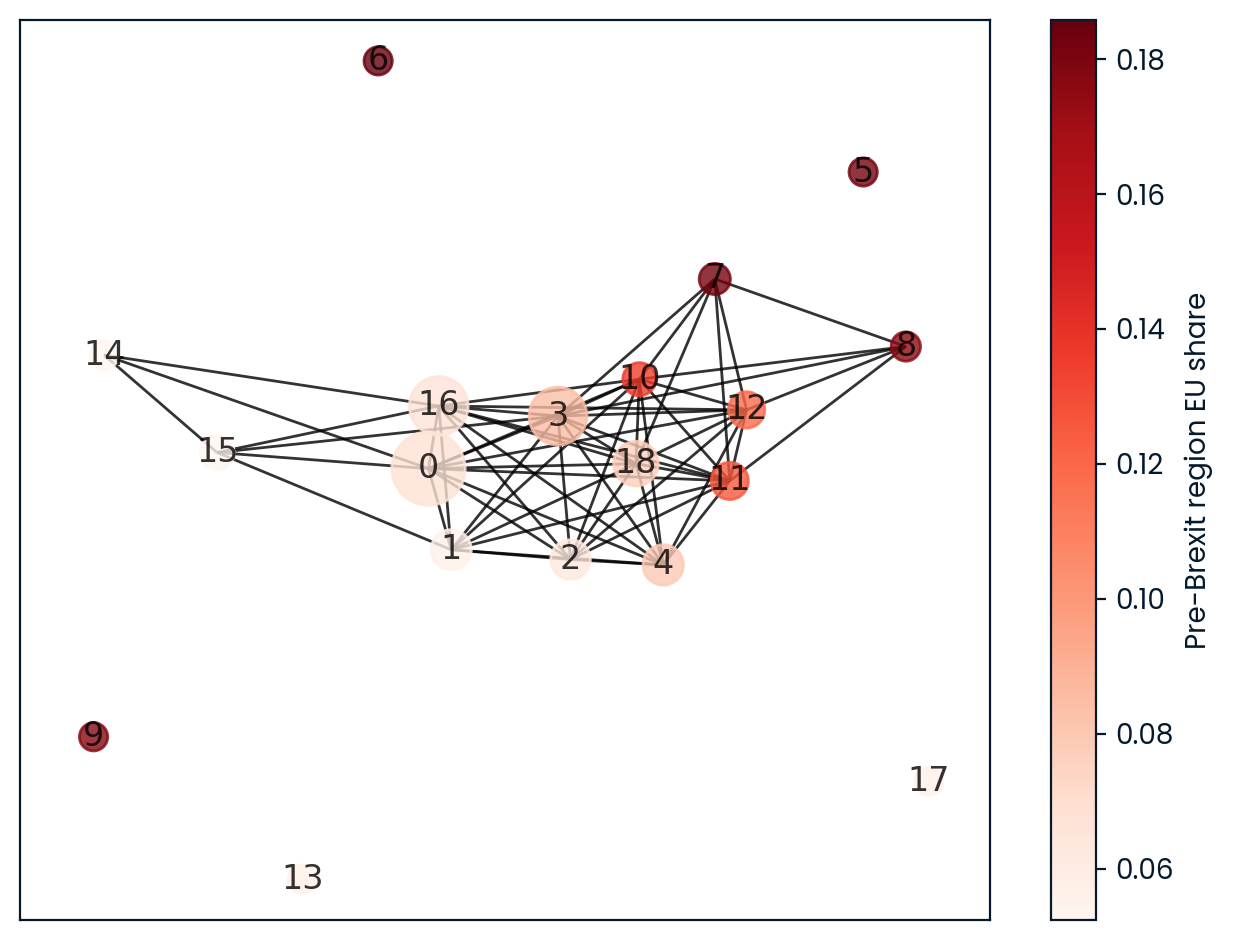

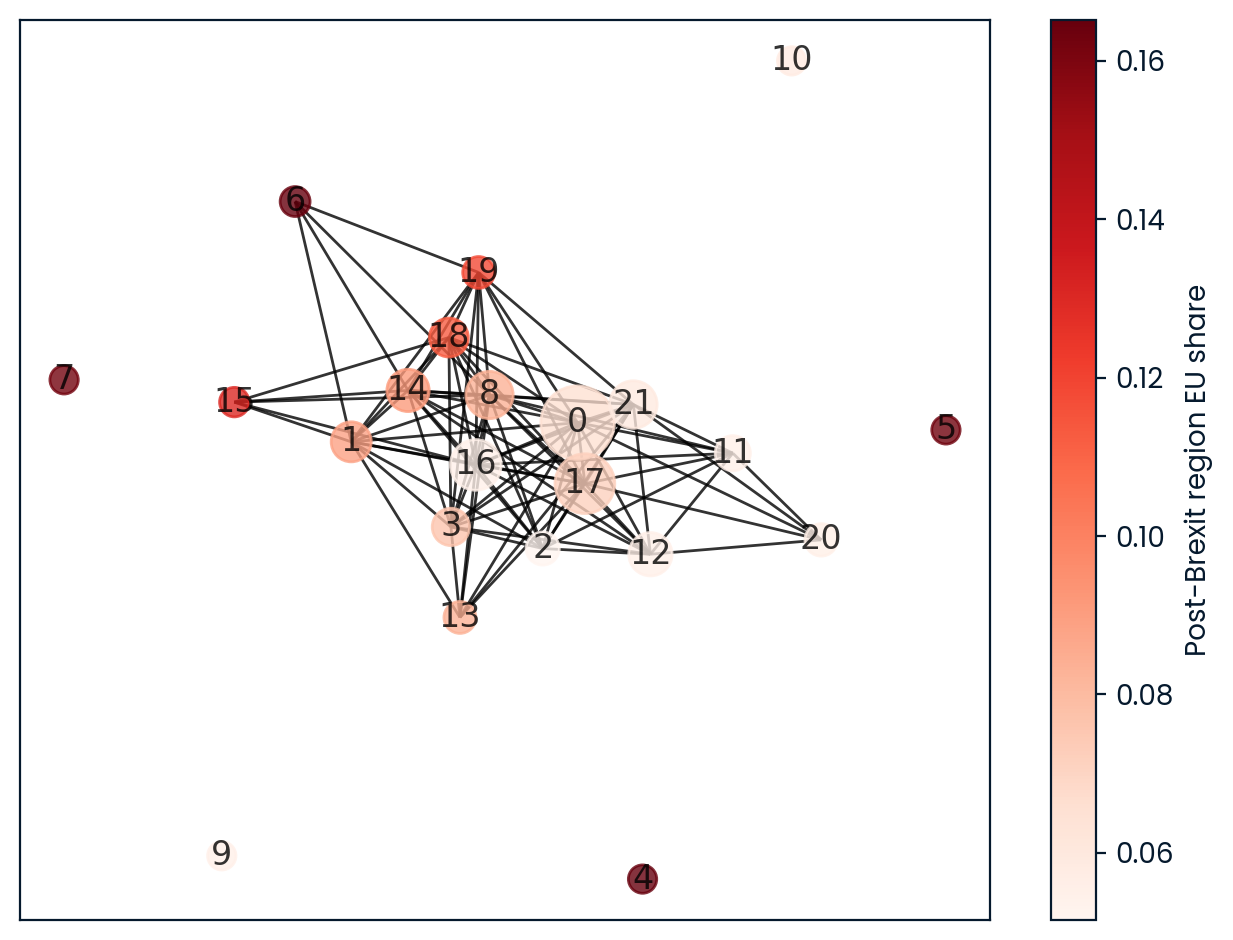

In [16]:
# Ball Mapper graphs
bm_pre  = pbm.BallMapper(X=X_pre,  eps=8, coloring_df=pd.DataFrame({"eu_share": c_pre_eu})) 
bm_post = pbm.BallMapper(X=X_post, eps=8, coloring_df=pd.DataFrame({"eu_share": c_post_eu}))
fig, ax = plt.subplots()
bm_pre.draw_networkx(ax=ax, coloring_variable="eu_share", colorbar=True,
                     colorbar_label="Pre-Brexit region EU share", pos=nx.spring_layout(bm_pre.Graph, k=1, seed=1))
fig.tight_layout()
fig.savefig("bm_pre_eu_share.png", dpi=150)

fig, ax = plt.subplots()
bm_post.draw_networkx(ax=ax, coloring_variable="eu_share", colorbar=True,
                      colorbar_label="Post-Brexit region EU share", pos=nx.spring_layout(bm_post.Graph, k=1, seed=1))
fig.tight_layout()
fig.savefig("bm_post_eu_share.png", dpi=150)

Now colour by non-eu

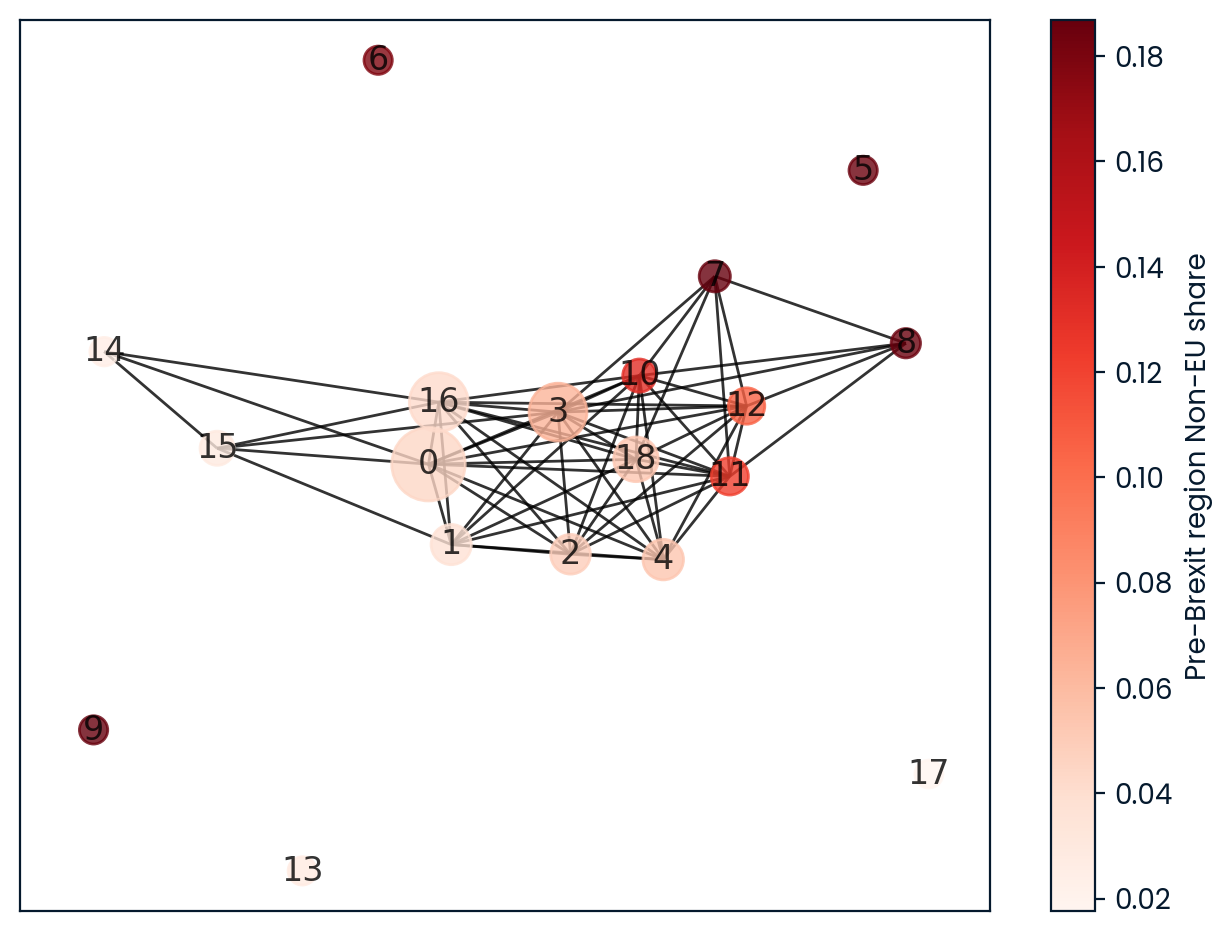

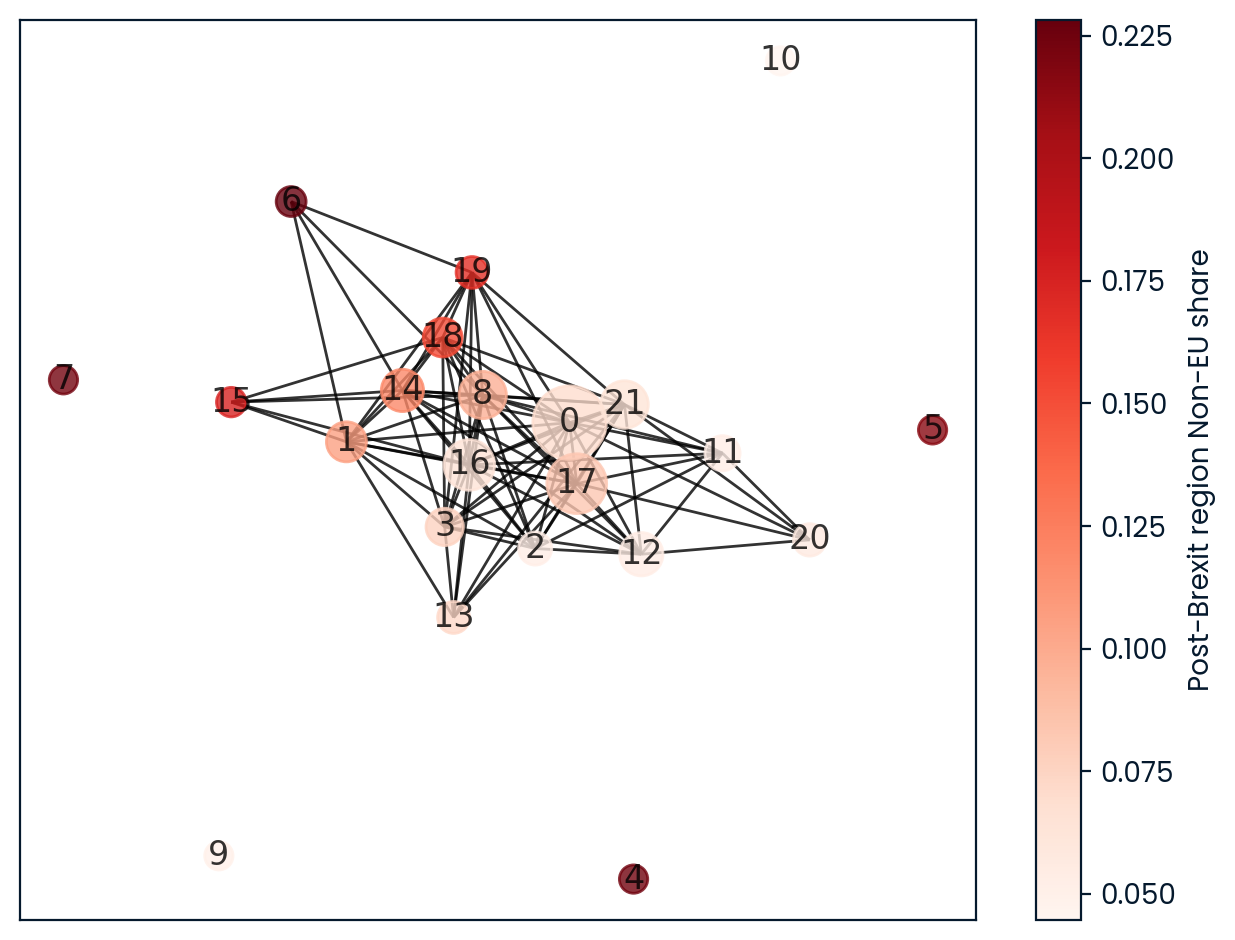

In [17]:
# Build Ball Mapper graphs coloured by NON-EU share
bm_pre  = pbm.BallMapper(X=X_pre,  eps=8,
                         coloring_df=pd.DataFrame({"non_eu_share": c_pre_non_eu}))
bm_post = pbm.BallMapper(X=X_post, eps=8,
                         coloring_df=pd.DataFrame({"non_eu_share": c_post_non_eu}))

# --- Pre-Brexit plot ---
fig, ax = plt.subplots()
bm_pre.draw_networkx(ax=ax,
                     coloring_variable="non_eu_share",
                     colorbar=True,
                     colorbar_label="Pre-Brexit region Non-EU share",
                     pos=nx.spring_layout(bm_pre.Graph, k=1, seed=1))
fig.tight_layout()
fig.savefig("bm_pre_non_eu_share.png", dpi=150)

# --- Post-Brexit plot ---
fig, ax = plt.subplots()
bm_post.draw_networkx(ax=ax,
                      coloring_variable="non_eu_share",
                      colorbar=True,
                      colorbar_label="Post-Brexit region Non-EU share",
                      pos=nx.spring_layout(bm_post.Graph, k=1, seed=1))
fig.tight_layout()
fig.savefig("bm_post_non_eu_share.png", dpi=150)

## Points and Balls

Will now find ball membership of all points in pre- and post- brexit netowrks

In [18]:
pb_pre = bm_pre.points_and_balls()
pb_post = bm_post.points_and_balls()
pb_pre
pb_post

,point,ball
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
2213,702,21
2214,703,21
2215,704,21
2216,706,21


In [19]:
pre.head()

,nuts318nm,nuts318cd,year,total_employees,proportion_uk_employees,proportion_eu_employees,proportion_non_eu_employees,uk_employees,eu_employees,non_eu_employees,employment_shareA,employment_shareB,employment_shareC,employment_shareD,employment_shareE,employment_shareF,employment_shareG,employment_shareH,employment_shareI,employment_shareJ,employment_shareK,employment_shareL,employment_shareM,employment_shareN,employment_shareO,employment_shareP,employment_shareQ,employment_shareR,employment_shareS,median_monthly_pay,pct_employed,pct_unemployed,pct_econ_inactive,pct_claimants,pop_density,region_area_km2,job_density,pct_single_parent,eu_leave_vote_share,pct_non_english_language,median_house_price,eu_nino_issue,noneu_nino_issue,total_nino
0,Hartlepool and Stockton-on-Tees,UKC11,2015.0,115350.0,0.956914,0.020694,0.022393,110380.0,2387.0,2583.0,0.0011,0.0019,0.1127,0.0069,0.0108,0.0693,0.1473,0.0433,0.0693,0.0173,0.0217,0.0130,0.1040,0.0693,0.0433,0.0867,0.1473,0.0195,0.0152,1534.75,70.5,7.7,23.5,3.36,966.3,308.17,0.68,16.7,0.64,2.55,129218.75,377.0,421.0,798.0
1,South Teesside,UKC12,2015.0,100086.0,0.956957,0.019343,0.023700,95778.0,1936.0,2372.0,0.0017,0.0100,0.0799,0.0020,0.0050,0.0449,0.1398,0.0499,0.0599,0.0175,0.0150,0.0150,0.0699,0.0599,0.0499,0.1199,0.2197,0.0250,0.0150,1471.50,65.5,10.1,27.0,4.04,919.8,308.44,0.67,15.5,0.66,4.35,125524.38,972.0,587.0,1559.0
2,Darlington,UKC13,2015.0,51211.0,0.955791,0.020347,0.023862,48947.0,1042.0,1222.0,0.0029,0.0020,0.0781,0.0000,0.0044,0.0342,0.1367,0.0488,0.0683,0.0586,0.0439,0.0088,0.0878,0.0878,0.0586,0.0683,0.1757,0.0156,0.0195,1526.67,72.6,6.4,22.2,2.88,537.1,197.48,0.85,11.8,0.56,4.20,130500.00,343.0,80.0,423.0
3,Durham CC,UKC14,2015.0,171860.0,0.957332,0.020633,0.022035,164527.0,3546.0,3787.0,0.0052,0.0012,0.1454,0.0007,0.0087,0.0581,0.1454,0.0407,0.0756,0.0116,0.0102,0.0145,0.0523,0.0523,0.0814,0.1163,0.1454,0.0174,0.0174,1559.92,67.4,7.7,26.9,2.21,233.4,2232.70,0.59,15.8,0.58,1.90,110000.00,608.0,505.0,1113.0
4,Northumberland,UKC21,2015.0,102228.0,0.954494,0.021354,0.024152,97576.0,2183.0,2469.0,0.0195,0.0034,0.1270,0.0024,0.0122,0.0488,0.1563,0.0293,0.1074,0.0171,0.0078,0.0146,0.0586,0.0439,0.0342,0.0879,0.1758,0.0293,0.0244,1507.83,74.2,5.5,21.3,1.37,63.2,5078.18,0.63,11.0,0.54,1.10,153062.50,298.0,92.0,390.0


In [20]:
# --- Pre-Brexit mapping ---
pb_pre = bm_pre.points_and_balls()
pb_pre = pb_pre.merge(
    pre.reset_index()[["index", "year", "nuts318cd", 'nuts318nm']],
    left_on="point", right_on="index", how="left"
).drop(columns=["index"])

# --- Post-Brexit mapping ---
pb_post = bm_post.points_and_balls()
pb_post = pb_post.merge(
    post.reset_index()[["index", "year", "nuts318cd", 'nuts318nm']],
    left_on="point", right_on="index", how="left"
).drop(columns=["index"])

# Preview
print(pb_pre.head())
print(pb_post.head())

   point  ball    year nuts318cd                        nuts318nm
0      0     0  2015.0     UKC11  Hartlepool and Stockton-on-Tees
1      1     0  2015.0     UKC12                   South Teesside
2      2     0  2015.0     UKC13                       Darlington
3      3     0  2015.0     UKC14                        Durham CC
4      4     0  2015.0     UKC21                   Northumberland
   point  ball    year nuts318cd                        nuts318nm
0      0     0  2021.0     UKC11  Hartlepool and Stockton-on-Tees
1      1     0  2021.0     UKC12                   South Teesside
2      2     0  2021.0     UKC13                       Darlington
3      3     0  2021.0     UKC14                        Durham CC
4      4     0  2021.0     UKC21                   Northumberland


In [21]:
# Group by 'ball' and aggregate 'nuts318nm' and 'year' into lists for pb_pre
ball_grouped_pre = pb_pre.groupby('ball').agg({
    'nuts318nm': list,
    'year': list
}).reset_index()

# Combine 'nuts318nm' and 'year' into one column for pb_pre
ball_grouped_pre['region_year'] = ball_grouped_pre.apply(lambda row: list(zip(row['nuts318nm'], row['year'])), axis=1)

# Drop the original 'nuts318nm' and 'year' columns for pb_pre
ball_grouped_pre.drop(columns=['nuts318nm', 'year'], inplace=True)

# Set 'ball' as the index for pb_pre
ball_grouped_pre.set_index('ball', inplace=True)

# Display the resulting table
ball_grouped_pre

,region_year
ball,
0,"[(Hartlepool and Stockton-on-Tees, 2015.0), (S..."
1,"[(Northumberland, 2015.0), (Blackpool, 2015.0)..."
2,"[(South Teesside, 2015.0), (Tyneside, 2015.0),..."
3,"[(Tyneside, 2015.0), (Greater Manchester South..."
4,"[(Greater Manchester North West, 2015.0), (Gre..."
5,"[(Camden and City of London, 2015.0), (Camden ..."
6,"[(Westminster, 2015.0), (Westminster, 2016.0),..."
7,[(Kensington & Chelsea and Hammersmith & Fulha...
8,"[(Hackney and Newham, 2015.0), (Haringey and I..."


In [22]:
# Output table
ball_grouped_pre.to_csv('ball_grouped_pre.csv')

In [23]:
# Group by 'ball' and aggregate 'nuts318nm' and 'year' into lists for pb_post
ball_grouped_post = pb_post.groupby('ball').agg({
    'nuts318nm': list,
    'year': list
}).reset_index()

# Combine 'nuts318nm' and 'year' into one column for pb_post
ball_grouped_post['region_year'] = ball_grouped_post.apply(lambda row: list(zip(row['nuts318nm'], [int(year) for year in row['year']])), axis=1)

# Drop the original 'nuts318nm' and 'year' columns for pb_post
ball_grouped_post.drop(columns=['nuts318nm', 'year'], inplace=True)

# Set 'ball' as the index for pb_post
ball_grouped_post.set_index('ball', inplace=True)

# Display the resulting table
ball_grouped_post

,region_year
ball,
0,"[(Hartlepool and Stockton-on-Tees, 2021), (Sou..."
1,"[(Tyneside, 2021), (Manchester, 2021), (Greate..."
2,"[(South Teesside, 2021), (Darlington, 2021), (..."
3,"[(Greater Manchester South West, 2021), (Warri..."
4,"[(Camden and City of London, 2021), (Camden an..."
5,"[(Westminster, 2021), (Westminster, 2022), (We..."
6,[(Kensington & Chelsea and Hammersmith & Fulha...
7,"[(Tower Hamlets, 2021), (Tower Hamlets, 2022),..."
8,"[(Tyneside, 2021), (Greater Manchester South W..."


In [24]:
# Output table
ball_grouped_post.to_csv('ball_grouped_post.csv')

# Quantitative Summary

## Simple Mean Change in EU workers pre- and post-Brexit

In [25]:
eu_change = (
    pre.groupby("nuts318cd")["proportion_eu_employees"].mean()
      .to_frame("eu_share_pre")
      .join(
          post.groupby("nuts318cd")["proportion_eu_employees"].mean()
            .to_frame("eu_share_post"),
          how="outer"
      )
)

eu_change["delta_post_minus_pre"] = eu_change["eu_share_post"] - eu_change["eu_share_pre"]
eu_change.sort_values("delta_post_minus_pre", inplace=True)
eu_change

,eu_share_pre,eu_share_post,delta_post_minus_pre
nuts318cd,,,
UKI33,0.188807,0.163778,-0.025029
UKI32,0.185782,0.163114,-0.022668
UKI45,0.178502,0.157506,-0.020996
UKI41,0.181975,0.163467,-0.018508
UKI31,0.182509,0.164989,-0.017520
...,...,...,...
UKF24,0.079260,0.086694,0.007434
UKH32,0.094408,0.102636,0.008227
UKF15,0.074658,0.083257,0.008599


## Replacement Ratio 

In [26]:
non_eu_change = (
    pre.groupby("nuts318cd")["proportion_non_eu_employees"].mean()
      .to_frame("non_eu_share_pre")
      .join(
          post.groupby("nuts318cd")["proportion_non_eu_employees"].mean()
            .to_frame("non_eu_share_post"),
          how="outer"
      )
)

non_eu_change["delta_post_minus_pre"] = non_eu_change["non_eu_share_post"] - non_eu_change["non_eu_share_pre"]
non_eu_change.sort_values("delta_post_minus_pre", inplace=True)
non_eu_change

,non_eu_share_pre,non_eu_share_post,delta_post_minus_pre
nuts318cd,,,
UKN11,0.013238,0.021073,0.007835
UKN07,0.015449,0.024831,0.009382
UKN13,0.016018,0.025404,0.009385
UKN08,0.015782,0.025316,0.009534
UKN16,0.015300,0.024835,0.009535
...,...,...,...
UKI72,0.188152,0.234025,0.045873
UKI74,0.185620,0.231775,0.046155
UKI63,0.188948,0.235853,0.046905


In [27]:
# Merge EU and non-EU deltas (indexed by nuts318cd)
rep = (
    eu_change.rename(columns={"delta_post_minus_pre": "delta_eu"})
    .join(
        non_eu_change[["delta_post_minus_pre"]]
            .rename(columns={"delta_post_minus_pre": "delta_noneu"}),
        how="inner"
    )
)

# Replacement ratio: only when EU fell and Non-EU rose
mask = (rep["delta_eu"] < 0) & (rep["delta_noneu"] > 0)
rep["replacement_ratio"] = 0.0
rep.loc[mask, "replacement_ratio"] = rep.loc[mask, "delta_noneu"] / (-rep.loc[mask, "delta_eu"])

# (optional) tidy up / sort
rep.replace([np.inf, -np.inf], np.nan, inplace=True)
rep = rep.sort_values("replacement_ratio", ascending=False)

rep

,eu_share_pre,eu_share_post,delta_eu,delta_noneu,replacement_ratio
nuts318cd,,,,,
UKM94,0.056262,0.056209,-0.000053,0.021403,400.742091
UKH34,0.083641,0.083537,-0.000104,0.031792,305.840977
UKM65,0.056459,0.056390,-0.000069,0.019738,287.887836
UKM95,0.053532,0.053421,-0.000111,0.022080,198.049677
UKD71,0.053293,0.053043,-0.000249,0.033241,133.341000
...,...,...,...,...,...
UKD62,0.052193,0.053510,0.001317,0.029006,0.000000
UKC13,0.023711,0.025067,0.001356,0.026812,0.000000
UKD41,0.048918,0.050371,0.001453,0.030588,0.000000


In [28]:
rep.to_csv('regional_replacement_ratio.csv')

## Robustness Check

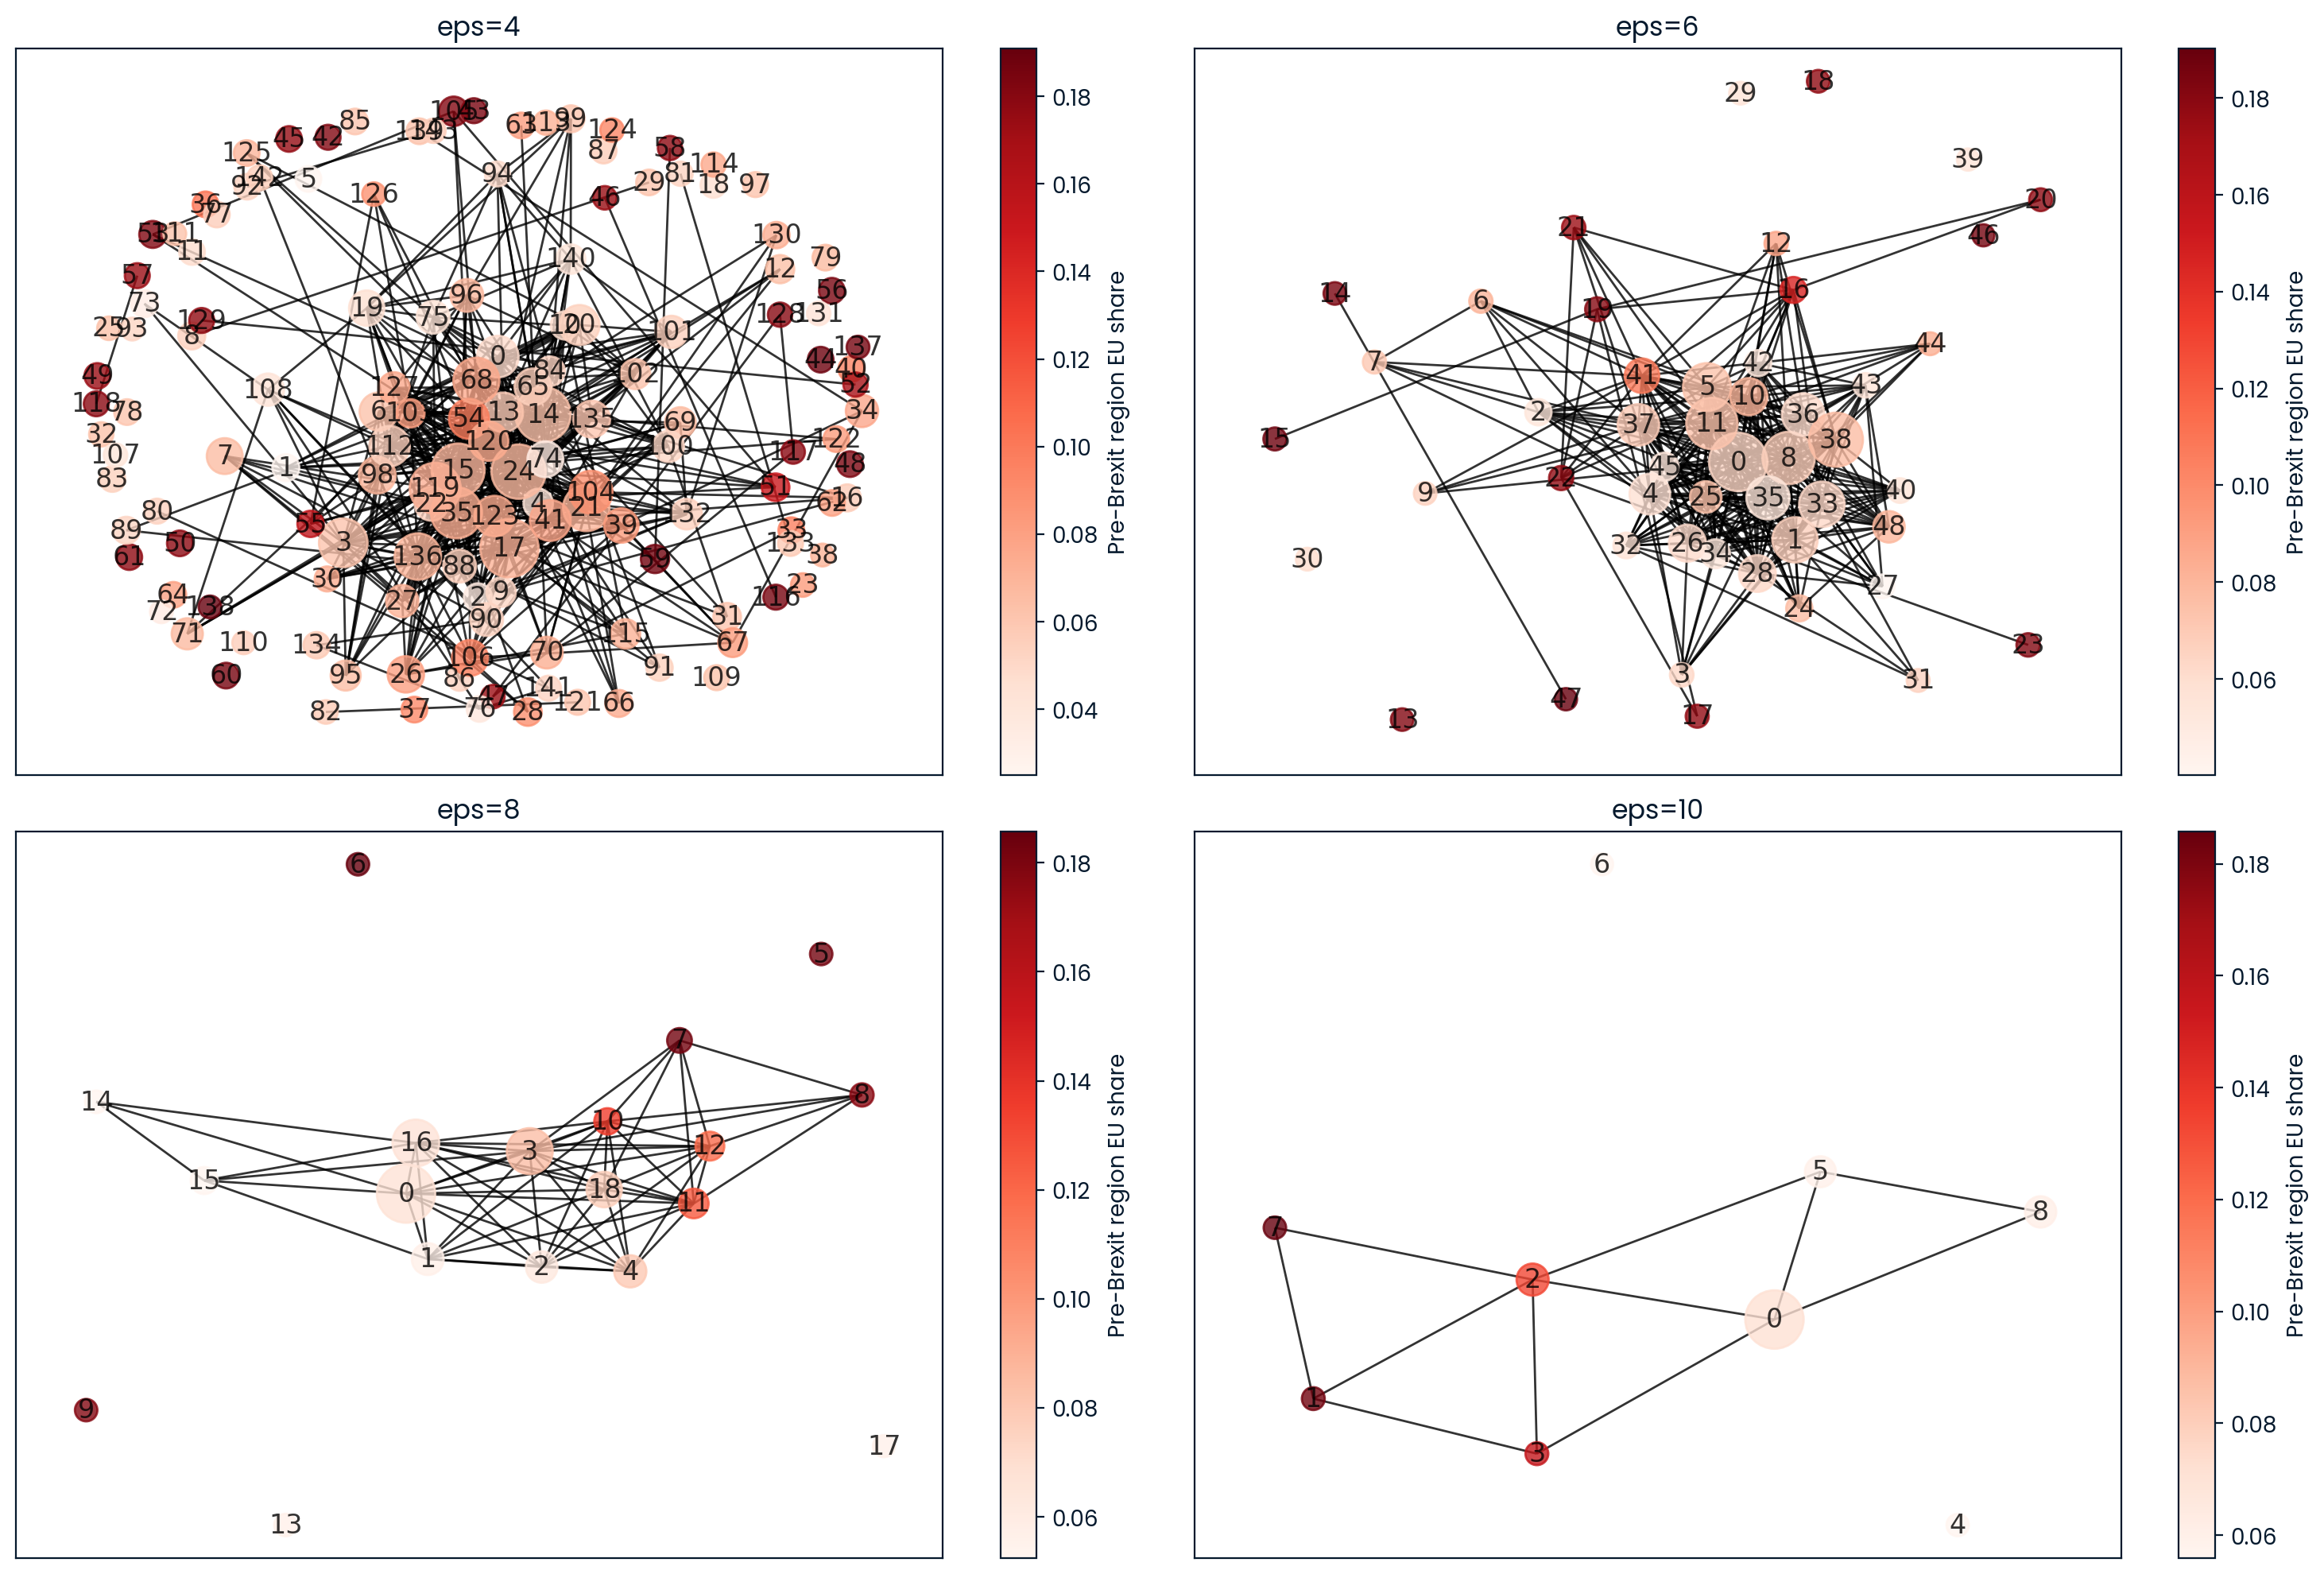

In [29]:
# Ball Mapper graphs
bm_pre1  = pbm.BallMapper(X=X_pre,  eps=4, coloring_df=pd.DataFrame({"eu_share": c_pre_eu})) 
bm_pre2  = pbm.BallMapper(X=X_pre,  eps=6, coloring_df=pd.DataFrame({"eu_share": c_pre_eu}))
bm_pre3  = pbm.BallMapper(X=X_pre,  eps=8, coloring_df=pd.DataFrame({"eu_share": c_pre_eu})) 
bm_pre4  = pbm.BallMapper(X=X_pre,  eps=10, coloring_df=pd.DataFrame({"eu_share": c_pre_eu})) 

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

bm_pre1.draw_networkx(ax=axs[0, 0], coloring_variable="eu_share", colorbar=True,
                     colorbar_label="Pre-Brexit region EU share", pos=nx.spring_layout(bm_pre1.Graph, k=1, seed=1))
axs[0, 0].set_title('eps=4')

bm_pre2.draw_networkx(ax=axs[0, 1], coloring_variable="eu_share", colorbar=True,
                     colorbar_label="Pre-Brexit region EU share", pos=nx.spring_layout(bm_pre2.Graph, k=1, seed=1))
axs[0, 1].set_title('eps=6')

bm_pre3.draw_networkx(ax=axs[1, 0], coloring_variable="eu_share", colorbar=True,
                     colorbar_label="Pre-Brexit region EU share", pos=nx.spring_layout(bm_pre3.Graph, k=1, seed=1))
axs[1, 0].set_title('eps=8')

bm_pre4.draw_networkx(ax=axs[1, 1], coloring_variable="eu_share", colorbar=True,
                     colorbar_label="Pre-Brexit region EU share", pos=nx.spring_layout(bm_pre4.Graph, k=1, seed=1))
axs[1, 1].set_title('eps=10')

fig.tight_layout()
fig.savefig('radius_robustness.png')